Loading dependencies 

In [2]:
import pandas as pd # standard python data library
import geopandas as gp # the geo-version of pandas
import numpy as np 
from statistics import mean, median
from pandas import read_csv
import os


Import raw files from source

In [3]:
wa_geo = gp.read_file("raw-from-source/2018Precincts_OK_Consol/2018Precincts_OK_Consol.shp")
wa_vest = gp.read_file("raw-from-source/wa_2018/wa_2018.shp")
wa_election_results = pd.read_csv('raw-from-source/20181106_allstateprecincts.csv')
wa_king = pd.read_csv('raw-from-source/2018_General_Election_eCanvass.csv')
wa_kings_names = pd.read_csv('raw-from-source/2018_Voting_Districts_for_King_County___votdst_area_2018.csv')
wa_yakima = pd.read_csv('raw-from-source/20181106_yakimaprecincts.csv')

<AxesSubplot:>

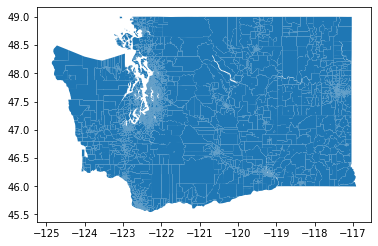

In [7]:
wa_geo.plot()

<AxesSubplot:>

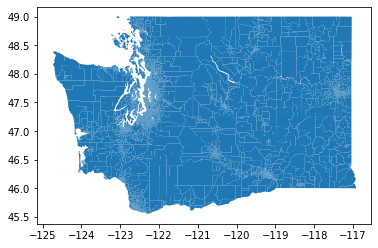

In [8]:
wa_vest.plot()

In [9]:
display(wa_vest)

,COUNTYCD,PRCCODE,FULLPRC,G18USSDCAN,G18USSRHUT,geometry
0,AD,111,AD00000111,38,89,"POLYGON ((-118.37353 47.13614, -118.37353 47.1..."
1,AD,112,AD00000112,36,73,"POLYGON ((-118.37079 47.13292, -118.37098 47.1..."
2,AD,113,AD00000113,59,123,"POLYGON ((-118.36870 47.12700, -118.36866 47.1..."
3,AD,114,AD00000114,58,111,"POLYGON ((-118.37378 47.12402, -118.37362 47.1..."
4,AD,115,AD00000115,55,124,"POLYGON ((-118.37107 47.12031, -118.37097 47.1..."
...,...,...,...,...,...,...
7307,PI,28-505,PI00028505,578,357,"POLYGON ((-122.55416 47.24650, -122.55412 47.2..."
7308,PI,28-515,PI00028515,545,401,"POLYGON ((-122.56108 47.24406, -122.56119 47.2..."
7309,SN,21014030,SN21014030,52,66,"MULTIPOLYGON (((-122.38474 48.24150, -122.3847..."
7310,SN,21014002,SN21014002,74,120,"POLYGON ((-122.37703 48.23797, -122.37693 48.2..."


In [10]:
wa_senators = wa_election_results[wa_election_results["Race"] == "U.S. Senator"]
print(wa_senators[wa_senators["CountyCode"] == "KI"])

              Race CountyCode        Candidate PrecinctName  PrecinctCode  \
2496  U.S. Senator         KI   Maria Cantwell        Total            -1   
2497  U.S. Senator         KI  Susan Hutchison        Total            -1   

       Votes  
2496  708654  
2497  247071  


In [11]:
county_level = wa_senators[(wa_senators["PrecinctCode"] != -1)] #does not account for king county, which will be added further down
kings = wa_senators[wa_senators["CountyCode"] == "KI"]
frames = [county_level, kings]
print(county_level["Votes"].sum())
non_total = pd.concat(frames)

#obfuscated data
total_votes_vest = non_total["Votes"].sum()
print(total_votes_vest)
total_votes_sos = 1803362 + 1282804 
print(total_votes_vest - total_votes_sos)
#how can we know if data has been obfuscated? What are the guidelines with this - do we look at precincts with 0 votes?
#and how can we be sure it's due to obfuscation and not from precincts having no residents

2129060
3084785
-1381


In [12]:
#FR
non_total["PrecinctCode"] = np.where(non_total["CountyCode"] == "FR", non_total["PrecinctCode"].astype('str').str.rjust(3, '0'),
                                    non_total["PrecinctCode"])
#GY
non_total["PrecinctCode"] = np.where(non_total["CountyCode"] == "GY", non_total["PrecinctCode"].astype('str').str.rjust(3, '0'),
                                    non_total["PrecinctCode"])
#TH
non_total["PrecinctCode"] = np.where(non_total["CountyCode"] == "TH", non_total["PrecinctCode"].astype('str').str.rjust(3, '0'),
                                    non_total["PrecinctCode"])
#KP
non_total["PrecinctCode"] = np.where(non_total["CountyCode"] == "KP", non_total["PrecinctCode"].astype('str').str.lstrip('1'),
                                    non_total["PrecinctCode"])
non_total["PrecinctCode"] = np.where(non_total["CountyCode"] == "KP", non_total["PrecinctCode"].astype('str').str.lstrip('0'),
                                    non_total["PrecinctCode"])
#PI
non_total["PrecinctCode"] = np.where(non_total["CountyCode"] == "PI", non_total["PrecinctCode"].astype('str').str.rjust(5, '0'),
                                    non_total["PrecinctCode"])
non_total["PrecinctCode"] = np.where(non_total["CountyCode"] == "PI", 
                                     non_total["PrecinctCode"].astype('str').str.slice(0, 2) + non_total["PrecinctCode"].astype('str').str.slice(2).str.rjust(3, '0'), 
                                     non_total["PrecinctCode"])

print(total_votes_vest)
print(non_total.Votes.sum())
display(non_total)

#how do we figure out we need to do this? Might be a broad question, but how does one get an intuition for which 

3084785
3084785


,Race,CountyCode,Candidate,PrecinctName,PrecinctCode,Votes
2,U.S. Senator,AD,Maria Cantwell,Ritzville Ward #1,111,38
3,U.S. Senator,AD,Susan Hutchison,Ritzville Ward #1,111,89
4,U.S. Senator,AD,Maria Cantwell,Ritzville Ward #2,112,36
5,U.S. Senator,AD,Susan Hutchison,Ritzville Ward #2,112,73
6,U.S. Senator,AD,Maria Cantwell,Ritzville Ward #3,113,59
...,...,...,...,...,...,...
9395,U.S. Senator,YA,Susan Hutchison,5101.38,5101,174
9396,U.S. Senator,YA,Maria Cantwell,5202.473(*),5202,0
9397,U.S. Senator,YA,Susan Hutchison,5202.473(*),5202,0
2496,U.S. Senator,KI,Maria Cantwell,Total,-1,708654


In [13]:
#processing king county
ki = non_total[non_total["CountyCode"] == "KI"]
rest = non_total[non_total["CountyCode"] != "KI"]

display(ki)

,Race,CountyCode,Candidate,PrecinctName,PrecinctCode,Votes
2496,U.S. Senator,KI,Maria Cantwell,Total,-1,708654
2497,U.S. Senator,KI,Susan Hutchison,Total,-1,247071


In [14]:
#display(wa_king)
wa_king = wa_king[wa_king["Race"] == "US Senator"]
#display(wa_king)
wa_king_frames = [wa_king[wa_king["Party"] == "Rep"], wa_king[wa_king["Party"] == "Dem"]]
wa_king = pd.concat(wa_king_frames)
display(wa_king)


,Precinct,Race,LEG,CC,CG,CounterGroup,Party,CounterType,SumOfCount
210936,SEA 34-1533,US Senator,34,8,7,Total,Rep,Susan Hutchison,26
211335,SEA 34-1534,US Senator,34,8,7,Total,Rep,Susan Hutchison,69
211783,BEL 48-0156,US Senator,48,6,9,Total,Rep,Susan Hutchison,172
212182,SEA 34-1535,US Senator,34,8,7,Total,Rep,Susan Hutchison,45
212630,SEA 34-1536,US Senator,34,8,7,Total,Rep,Susan Hutchison,39
...,...,...,...,...,...,...,...,...,...
370497,SEA 34-1507,US Senator,34,8,7,Total,Dem,Maria Cantwell,249
370504,SEA 34-1508,US Senator,34,8,7,Total,Dem,Maria Cantwell,166
370511,SEA 34-1509,US Senator,34,8,7,Total,Dem,Maria Cantwell,202
370518,SEA 34-1510,US Senator,34,8,7,Total,Dem,Maria Cantwell,303


In [15]:
wa_kings_names = pd.read_csv('raw-from-source/2018_Voting_Districts_for_King_County___votdst_area_2018.csv')
wa_kings_names["votdst"] = wa_kings_names["votdst"].astype('str').str.rjust(4, '0')
wa_kings_names = {name: num for name, num in zip(wa_kings_names["NAME"], wa_kings_names['votdst'])}
wa_king["Precinct"] = wa_king["Precinct"].apply(lambda x: wa_kings_names[x] if x in wa_kings_names else x)
#finding votes not associated with any precinct in king
display(wa_king[(wa_king["Precinct"] == "ELECTIONS OFFICE") & (wa_king["Race"] == 'US Senator') &
               ((wa_king["CounterType"] == "Maria Cantwell") | (wa_king["CounterType"] == "Susan Hutchison"))])

elections_office = wa_king[(wa_king["Precinct"] == "ELECTIONS OFFICE") & (wa_king["Race"] == 'US Senator') &
               ((wa_king["CounterType"] == "Maria Cantwell") | (wa_king["CounterType"] == "Susan Hutchison"))]

display(wa_king)

wa_king["FULLPRC"] = "KI" + wa_king["Precinct"].apply(lambda x:str(x).zfill(8))
wa_king = wa_king.pivot_table(index="FULLPRC", columns="CounterType", values="SumOfCount", aggfunc="first").reset_index()
display(wa_king)

,Precinct,Race,LEG,CC,CG,CounterGroup,Party,CounterType,SumOfCount
364791,ELECTIONS OFFICE,US Senator,0,0,9,Total,Rep,Susan Hutchison,1
364792,ELECTIONS OFFICE,US Senator,0,0,9,Total,Dem,Maria Cantwell,10


,Precinct,Race,LEG,CC,CG,CounterGroup,Party,CounterType,SumOfCount
210936,1533,US Senator,34,8,7,Total,Rep,Susan Hutchison,26
211335,1534,US Senator,34,8,7,Total,Rep,Susan Hutchison,69
211783,0156,US Senator,48,6,9,Total,Rep,Susan Hutchison,172
212182,1535,US Senator,34,8,7,Total,Rep,Susan Hutchison,45
212630,1536,US Senator,34,8,7,Total,Rep,Susan Hutchison,39
...,...,...,...,...,...,...,...,...,...
370497,1507,US Senator,34,8,7,Total,Dem,Maria Cantwell,249
370504,1508,US Senator,34,8,7,Total,Dem,Maria Cantwell,166
370511,1509,US Senator,34,8,7,Total,Dem,Maria Cantwell,202
370518,1510,US Senator,34,8,7,Total,Dem,Maria Cantwell,303


CounterType,FULLPRC,Maria Cantwell,Susan Hutchison
0,KI00000001,258,58
1,KI00000003,265,111
2,KI00000009,113,64
3,KI00000010,483,258
4,KI00000011,140,56
...,...,...,...
2599,KI00003798,297,44
2600,KI00003799,140,100
2601,KI00003800,271,202
2602,KI00003801,214,93


In [16]:
rep_vote = elections_office.iloc[0]['SumOfCount']
dem_vote = elections_office.iloc[1]['SumOfCount']
print(dem_vote + rep_vote)

rep_total = wa_king["Susan Hutchison"].to_numpy()
dem_total = wa_king["Maria Cantwell"].to_numpy()


rep = np.argsort(rep_total)[::-1][:rep_vote]
dem = np.argsort(dem_total)[::-1][:dem_vote]

for i in dem:
    wa_king.iloc[i, 1] +=1
    
for i in rep:
    wa_king.iloc[i, 2] +=1
    
wa_king_final = wa_king[wa_king["FULLPRC"] != "KIELECTIONS OFFICE"]
display(wa_king_final)

11


CounterType,FULLPRC,Maria Cantwell,Susan Hutchison
0,KI00000001,258,58
1,KI00000003,265,111
2,KI00000009,113,64
3,KI00000010,483,258
4,KI00000011,140,56
...,...,...,...
2598,KI00003797,292,38
2599,KI00003798,297,44
2600,KI00003799,140,100
2601,KI00003800,271,202


In [23]:
# Yakima county has one more democratic vote 
ya = rest[rest["CountyCode"] == "YA"]
display(ya)
print(ya['Votes'].sum())
yakima_clean = wa_yakima[wa_yakima["U.S. Senator"] == "U.S. Senator"]
display(yakima_clean)
yakima_clean = yakima_clean.iloc[3:]
print(yakima_clean["29476"].sum())

,Race,CountyCode,Candidate,PrecinctName,PrecinctCode,Votes
9052,U.S. Senator,YA,Maria Cantwell,0001 - COUNTY COURTHOUSE(*),1,0
9053,U.S. Senator,YA,Susan Hutchison,0001 - COUNTY COURTHOUSE(*),1,0
9054,U.S. Senator,YA,Maria Cantwell,0101.333,101,130
9055,U.S. Senator,YA,Susan Hutchison,0101.333,101,102
9056,U.S. Senator,YA,Maria Cantwell,0102.333,102,94
...,...,...,...,...,...,...
9393,U.S. Senator,YA,Susan Hutchison,5020.584,5020,262
9394,U.S. Senator,YA,Maria Cantwell,5101.38,5101,96
9395,U.S. Senator,YA,Susan Hutchison,5101.38,5101,174
9396,U.S. Senator,YA,Maria Cantwell,5202.473(*),5202,0


70412


,U.S. Senator,Maria Cantwell,Total,-1,29476
0,U.S. Senator,Susan Hutchison,Total,-1,40958
1,U.S. Senator,Maria Cantwell,0001 - COUNTY COURTHOUSE(*),1,0
2,U.S. Senator,Susan Hutchison,0001 - COUNTY COURTHOUSE(*),1,0
3,U.S. Senator,Maria Cantwell,0101.333,101,130
4,U.S. Senator,Susan Hutchison,0101.333,101,102
...,...,...,...,...,...
342,U.S. Senator,Susan Hutchison,5020.584,5020,262
343,U.S. Senator,Maria Cantwell,5101.38,5101,96
344,U.S. Senator,Susan Hutchison,5101.38,5101,174
345,U.S. Senator,Maria Cantwell,5202.473(*),5202,0


70412


In [20]:
pivoted = wa_senators.pivot_table(columns = ["Candidate"], index = ["PrecinctCode", "CountyCode"], values = ["Votes"], aggfunc='first').reset_index()
pivoted['PrecinctCode'] = pivoted['PrecinctCode'].apply(lambda x:str(x).zfill(8))
pivoted['FULLPRC'] = pivoted["CountyCode"] + pivoted["PrecinctCode"]
pivoted.columns = pivoted.columns.get_level_values(0)
pivoted.columns = ["PRCCODE", "COUNTYCD", "G18USSDCAN", "G18USSRHUT", "FULLPRC" ]
pivoted

,PRCCODE,COUNTYCD,G18USSDCAN,G18USSRHUT,FULLPRC
0,00000001,AS,57,138,AS00000001
1,00000001,CU,18,65,CU00000001
2,00000001,CZ,260,219,CZ00000001
3,00000001,FR,13,9,FR00000001
4,00000001,GR,107,257,GR00000001
...,...,...,...,...,...
4655,73234099,SN,390,154,SN73234099
4656,73234143,SN,226,115,SN73234143
4657,73234149,SN,267,142,SN73234149
4658,73234176,SN,287,124,SN73234176


In [27]:
yas = wa_vest[wa_vest['COUNTYCD']== "YA"]
display(yas)
num = yas['G18USSDCAN'].sum() + yas['G18USSRHUT'].sum()
print(num)
display(wa_vest)

,COUNTYCD,PRCCODE,FULLPRC,G18USSDCAN,G18USSRHUT,geometry
6290,YA,101,YA00000101,130,102,"POLYGON ((-120.50061 46.60520, -120.50050 46.6..."
6291,YA,102,YA00000102,94,44,"POLYGON ((-120.49841 46.60401, -120.49852 46.6..."
6292,YA,103,YA00000103,171,80,"POLYGON ((-120.47555 46.60538, -120.47555 46.6..."
6293,YA,104,YA00000104,67,18,"POLYGON ((-120.51400 46.61433, -120.51409 46.6..."
6294,YA,105,YA00000105,132,68,"POLYGON ((-120.51196 46.61433, -120.51195 46.6..."
...,...,...,...,...,...,...
6462,YA,5101,YA00005101,96,174,"POLYGON ((-120.44578 46.64973, -120.43506 46.6..."
6463,YA,5202,YA00005202,1,1,"POLYGON ((-119.91557 46.54834, -119.91563 46.5..."
6464,YA,701,YA00000701,109,50,"POLYGON ((-120.54682 46.40278, -120.54682 46.4..."
6465,YA,900,YA00000900,0,0,"POLYGON ((-119.99111 46.22942, -119.99059 46.2..."


70434


,COUNTYCD,PRCCODE,FULLPRC,G18USSDCAN,G18USSRHUT,geometry
0,AD,111,AD00000111,38,89,"POLYGON ((-118.37353 47.13614, -118.37353 47.1..."
1,AD,112,AD00000112,36,73,"POLYGON ((-118.37079 47.13292, -118.37098 47.1..."
2,AD,113,AD00000113,59,123,"POLYGON ((-118.36870 47.12700, -118.36866 47.1..."
3,AD,114,AD00000114,58,111,"POLYGON ((-118.37378 47.12402, -118.37362 47.1..."
4,AD,115,AD00000115,55,124,"POLYGON ((-118.37107 47.12031, -118.37097 47.1..."
...,...,...,...,...,...,...
7307,PI,28-505,PI00028505,578,357,"POLYGON ((-122.55416 47.24650, -122.55412 47.2..."
7308,PI,28-515,PI00028515,545,401,"POLYGON ((-122.56108 47.24406, -122.56119 47.2..."
7309,SN,21014030,SN21014030,52,66,"MULTIPOLYGON (((-122.38474 48.24150, -122.3847..."
7310,SN,21014002,SN21014002,74,120,"POLYGON ((-122.37703 48.23797, -122.37693 48.2..."
